### Data

The movie imported below is from 651 *randomly* sampled movies. Since it has been randomly sampled, you can generalize it to the rest of the movie population.

### Research Question

Before a research question is posed, we must think about the question the hypothetical boss is asking, "What makes a movie popular?" I think the best answer is one that I can't prove and is out of scope of this project. That answer is *word of mouth and online reviews*. While audience score, IMDB votes and others are available to us, they are presented ex post facto. 

Therefore, I will first ask the question, **are there any variables, before a movie is released, that can be used to predict IMDB rating?** 

I will then provide information, per the boss's second ask of "learning something new about movies", by modeling the Rotten Tomatoes critic's score with IMDB rating. 

These two items were of interest to me because they seemed the most inline with what the boss is asking.


### Exploratory Data Analysis

First we must clarify what variables are being classified in the category of *before a movie is released*. We will then quickly model a 1-2 variables to get some context. We will then build a model using a bottom up approach, attempting to discover variables associated with *before movie is released* that can be used to predict imdb_rating. Let's get started.

#### Variables 

- genre
- mpaa_rating
- thtr_rel_month
- title_type

All of the above variables are variables that have, I suspect, been established before a movie is released. **Importantly, they contain a finite number of levels that can be understood (i.e., the *title* variable will contain 651 different levels which isn't conducive to this analysis).** There are others, but these stood out as most relevant to the question at hand

In [195]:
library(ggplot2)
suppressMessages(library(dplyr))

In [196]:
load('../data//movie.rda')

In [197]:
head(movies)

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
Old Partner,Documentary,Documentary,78,Unrated,Shcalo Media Group,2009,1,15,2010,⋯,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NA,NA,http://www.imdb.com/title/tt1334549/,//www.rottentomatoes.com/m/old-partner/


In [198]:
nrow(movies)

[1] 651

We've imported our data, now we can select the desired columns of data, detailed by the list above, plus imdb_rating as the response variable.

In [223]:
df <- movies %>% select(
    imdb_rating,
    genre,
    mpaa_rating,
    thtr_rel_month,
    title_type,
)

In [224]:
head(df, 1)

imdb_rating,genre,mpaa_rating,thtr_rel_month,title_type
<dbl>,<fct>,<fct>,<dbl>,<fct>
5.5,Drama,R,4,Feature Film


I'll start with a simple model to get some baring. This is not to be confused with a parsimonious model as we I'm not yet optimizing. Remember, the variables are as follows:

- genre
- mpaa_rating
- thtr_rel_month
- title_type

In [227]:
model1 <- lm(imdb_rating ~ genre+title_type, df)
sm1 <- summary(model1)

#### Table 1.

In [228]:
sm1


Call:
lm(formula = imdb_rating ~ genre + title_type, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9818 -0.4818  0.0312  0.6182  2.5203 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.82401    0.36979  18.454  < 2e-16 ***
genreAnimation           -0.07077    0.33997  -0.208  0.83517    
genreArt House & Inter.   0.64352    0.28164   2.285  0.02265 *  
genreComedy              -0.24556    0.15692  -1.565  0.11812    
genreDocumentary          0.87330    0.37492   2.329  0.02016 *  
genreDrama                0.71106    0.13071   5.440  7.6e-08 ***
genreHorror              -0.20990    0.23191  -0.905  0.36577    
genreMusical & Per. Arts  1.04482    0.32223   3.242  0.00125 ** 
genreMystery Suspense     0.50889    0.17188   2.961  0.00318 ** 
genreOther                0.70046    0.26813   2.612  0.00920 ** 
genreSciFy & Fantasy     -0.21521    0.33997  -0.633  0.52694    
title_typeFeature Film   -0.85324 

In Table 1, we have modeled genre and title_type against imdb_rating. There is a very low R-squared value indicating these data don't fit the regression line very well. Even though there are some data points that show some significance, these data are significantly different from each other. Therefore, much can't be said about this model. 

Let's start modeling by added newer variables to see if we can't optimize the and find a model that will be good for predicting IMDB ratings.

### Modeling

In [233]:
model2 <- lm(imdb_rating ~ genre+title_type+mpaa_rating, df)
sm2 <- summary(model2)

#### Table 2.

In [234]:
sm2


Call:
lm(formula = imdb_rating ~ genre + title_type + mpaa_rating, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9664 -0.4886  0.0577  0.6114  2.4796 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.2291     0.4334  16.681  < 2e-16 ***
genreAnimation            -0.3935     0.3704  -1.062  0.28847    
genreArt House & Inter.    0.5608     0.2868   1.955  0.05100 .  
genreComedy               -0.1963     0.1574  -1.247  0.21285    
genreDocumentary           0.7969     0.3778   2.109  0.03532 *  
genreDrama                 0.7142     0.1332   5.361 1.16e-07 ***
genreHorror               -0.2755     0.2357  -1.169  0.24294    
genreMusical & Per. Arts   1.0285     0.3220   3.194  0.00147 ** 
genreMystery Suspense      0.4923     0.1750   2.813  0.00506 ** 
genreOther                 0.7054     0.2679   2.633  0.00866 ** 
genreSciFy & Fantasy      -0.2675     0.3386  -0.790  0.42978    
title_typeFeatu

In Table 2, none of the variables have much explanatory power. We'll add the last variable to the model and see if it makes a difference.

In [241]:
model3 <- lm(imdb_rating ~ genre+title_type+mpaa_rating+thtr_rel_month, df)
sm3 <- summary(model3)

#### Table 3.

In [242]:
sm3


Call:
lm(formula = imdb_rating ~ genre + title_type + mpaa_rating + 
    thtr_rel_month, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9640 -0.4749  0.0448  0.5817  2.4163 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               7.08421    0.43727  16.201  < 2e-16 ***
genreAnimation           -0.41409    0.36945  -1.121  0.26279    
genreArt House & Inter.   0.56448    0.28602   1.974  0.04887 *  
genreComedy              -0.20187    0.15696  -1.286  0.19887    
genreDocumentary          0.80630    0.37674   2.140  0.03272 *  
genreDrama                0.70994    0.13284   5.344 1.27e-07 ***
genreHorror              -0.26621    0.23508  -1.132  0.25788    
genreMusical & Per. Arts  1.01133    0.32114   3.149  0.00171 ** 
genreMystery Suspense     0.50409    0.17461   2.887  0.00402 ** 
genreOther                0.72096    0.26720   2.698  0.00716 ** 
genreSciFy & Fantasy     -0.26052    0.33762  -0.772  0.44061   

As can be seen in Table 3, by adding the last variable, mpaa_rating, genre, title_type and thtr_rel_month have very low explanatory power indicated by the adjust R-squared value: 0.2362.

#### Modeling Rotten Tomatoes Critic's Score against IMDB Rating

Now, Rotten Tomatoes Critic's Score will be modeled against IMDB Rating. First, the data needs to be formatted correctly by grabbing all the correct columns; in this case, *imdb_rating* and *critics_score*.

In [246]:
df2 <- movies %>% select(imdb_rating, critics_score)

In [248]:
model4 <- lm(imdb_rating~critics_score, df2)
sm4 <- summary(model4)

#### Table 4.

In [249]:
sm4


Call:
lm(formula = imdb_rating ~ critics_score, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.93679 -0.39499  0.04512  0.43875  2.47556 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.8075715  0.0620690   77.45   <2e-16 ***
critics_score 0.0292177  0.0009654   30.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6991 on 649 degrees of freedom
Multiple R-squared:  0.5853,	Adjusted R-squared:  0.5846 
F-statistic: 915.9 on 1 and 649 DF,  p-value: < 2.2e-16


From the information in Table 4, 58% of the data in *imdb_rating* is explained by *critics_score*. This can be used as a starting point to graph the model. While the original research question was centered around these two data sets, I'm going to add one more variable, *genre*, and see what happens.

In [250]:
df3 <- movies %>% select(imdb_rating, critics_score, genre)

In [253]:
model5 <- lm(imdb_rating~critics_score+genre, df3)
sm5 <- summary(model5)

#### Table 5.

In [254]:
sm5


Call:
lm(formula = imdb_rating ~ critics_score + genre, data = df3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78670 -0.36415  0.04579  0.41068  2.04856 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.872581   0.094546  51.537  < 2e-16 ***
critics_score                   0.026507   0.001043  25.408  < 2e-16 ***
genreAnimation                 -0.303801   0.241291  -1.259 0.208467    
genreArt House & International  0.372829   0.200032   1.864 0.062801 .  
genreComedy                    -0.212391   0.111148  -1.911 0.056466 .  
genreDocumentary                0.486754   0.134554   3.618 0.000321 ***
genreDrama                      0.151631   0.095121   1.594 0.111412    
genreHorror                    -0.276849   0.164500  -1.683 0.092869 .  
genreMusical & Performing Arts  0.395248   0.216152   1.829 0.067932 .  
genreMystery & Suspense         0.151015   0.122715   1.231 0.218919    
genreOthe

In table 5, the r2 value increased, roughly, 3% to 61%. We can now plot the data by genre and fit a line to each graph.

#### Figure 1.

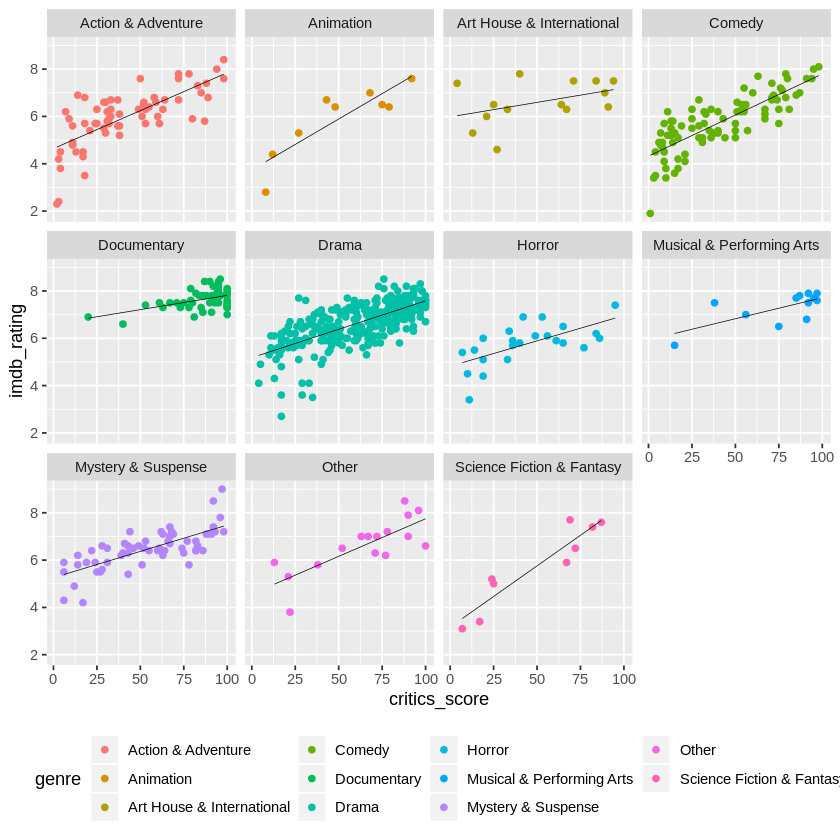

In [257]:
ggplot(df3, aes(x=critics_score, y=imdb_rating, colour=genre))+ 
geom_point() + 
geom_smooth(method="lm", se=FALSE, colour="black", size=0.2, formula= y~x) +
facet_wrap(~genre) +
theme(legend.position = "bottom")

In Figure 1, many of the data points, while positively correlated, as one would expect, are not very tight around the regression line.

Next, I'll visualize the residuals to make sure they are nearly normal.

#### Figure 2.

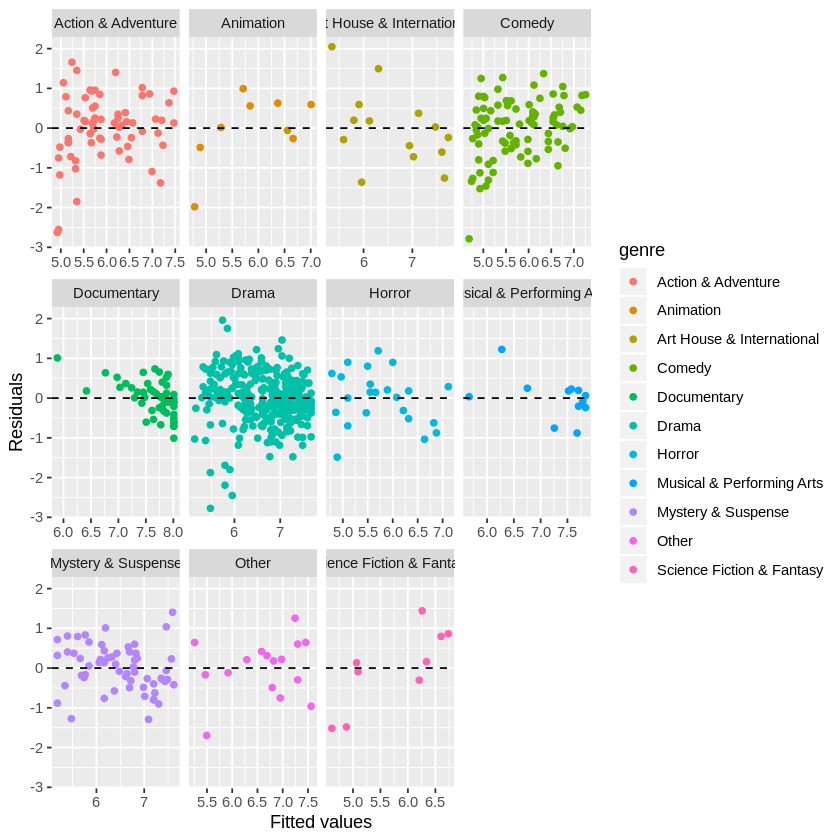

In [260]:
ggplot(data = model5, aes(x = .fitted, y = .resid, colour=genre)) +
geom_point() +
facet_wrap(~genre, scales="free_x")+
geom_hline(yintercept = 0, linetype = "dashed") +
xlab("Fitted values") +
ylab("Residuals")

#### Figure 3.

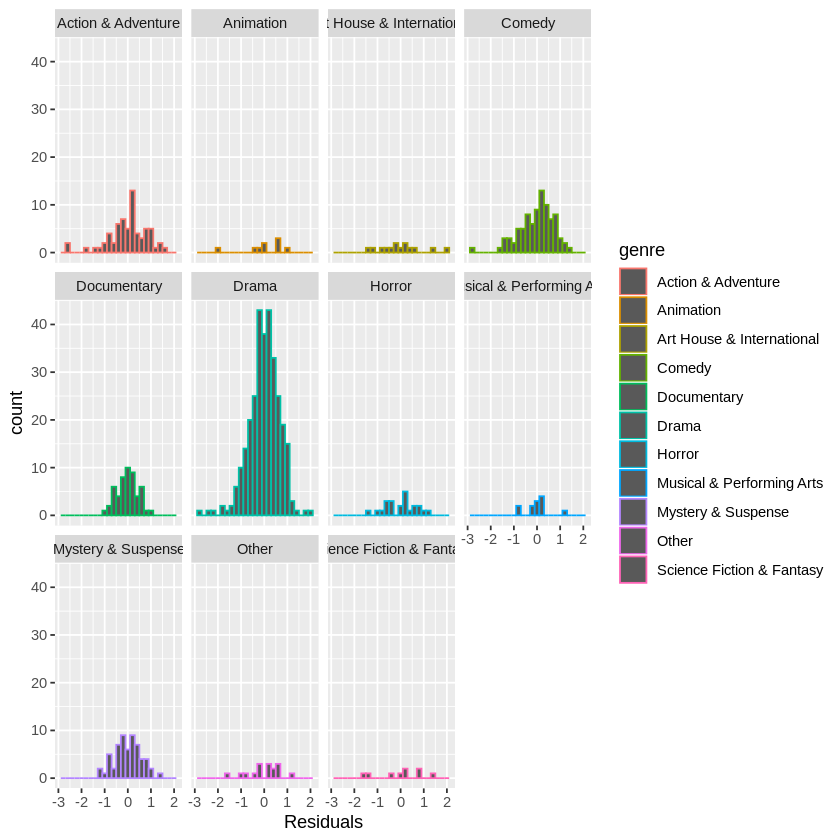

In [264]:
ggplot(data = model5, aes(x = .resid, colour=genre)) +
  geom_histogram(binwidth = .2) +
  xlab("Residuals") + facet_wrap(~genre)

In figures 2 the data points for all movie genres appear to be randomly scattered. In figure 3, the residuals created nearly normal distributions. Both points indicating the regression is trustworthy.

### Prediction

While it's desirous to have a higher R-squared value, I think we use this as a starting point to make predictions. Looking at Figure 1., I'll select *Mystery & Suspense* to make prediction a prediction about a 2016 movies IMDB rating. I chose *The Girl on the Train*. It has a Rotten Tomatoes critics score of 44%. Below is the code making predictions.

In [275]:
pred_df1 <- data.frame(critics_score= c(44), genre= c("Mystery & Suspense"))

In [278]:
MS <- predict(model5, pred_df1)

In [279]:
MS

1 
6.189886

According to my model, the IMDB rating of *The Girl on the Train* should be 6.18 or 6.2 when rounding up. The actual IMDB rating is 6.5. 

### Conclusion

In conclusion, the ability to predict a movie's imdb_rating, before it's released and in the hands of previewing audiences and critics, is difficult of non-existant using the 4 variables described earlier:

- genre
- mpaa_rating
- thtr_rel_month
- title_type

These items together were only able to explain, at most, 24% of data indicated by the R-squared value in Table 3. My hypothesis about the word of mouth would be the next logical step in assessing the ability to predict the popularity of a movie. 

I also compared Rotten Tomatoes Critics Rating with with IMDB Rating in an attempt to establish predictive power of an IMDB Rating by the Critics Rating. The predictive power was much higher, albeit still fuzzy at 60%. I would imagine if you added audience scores to the the model, it would have been even higher. However, those two variables could be collinear and cause issues in the model. Another potential issue with the model is the possible collinearity of an IMDB rating and a Critics Rating. There might be a few individuals who are both in which case this could bias the model.

Testing the model yielded promising results, albeit off by a few points. Testing the model against the 2016 movie, *The Girl on the Train*, the model produced a score of 6.2 while the actual score of 6.5. If the right variables are found, I imagine you could use this model to predict the IMDB rating with high certainty.